In [1]:
import numpy as np
import scipy.fftpack as spfft
from sklearn.linear_model import Lasso
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

In [2]:
all_qtables = np.load("30_all_qtables.npy").astype(np.float32)
finalqtable = all_qtables[-1]
map_size = int(np.sqrt(finalqtable.shape[0]))

In [3]:
print(all_qtables.shape)

(192679, 900, 4)


In [4]:
def viz_qtable(qtable, description):
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    no_of_states, no_of_actions = qtable.shape
    mapdim = int(np.sqrt(no_of_states))
    # https://stackoverflow.com/questions/13784201/how-to-have-one-colorbar-for-all-subplots
    fig, axes = plt.subplots(nrows=1, ncols=no_of_actions, figsize=(16, 4))
    cmap = matplotlib.colormaps['winter']
    # normalizer = matplotlib.colors.Normalize(vmin=-2, vmax=2)
    normalizer = matplotlib.colors.Normalize()
    im = matplotlib.cm.ScalarMappable(norm=normalizer, cmap=cmap)
    
    for i,ax in enumerate(axes):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.title.set_text(directions[i])
        im = ax.imshow(qtable[:,i].reshape(mapdim,mapdim),
                       cmap=cmap,
                       norm=normalizer)
    # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    # fig.colorbar(im, cax=cbar_ax)
    fig.colorbar(im, ax=axes.ravel().tolist())
    fig.suptitle(description, fontsize=10)
    plt.show()

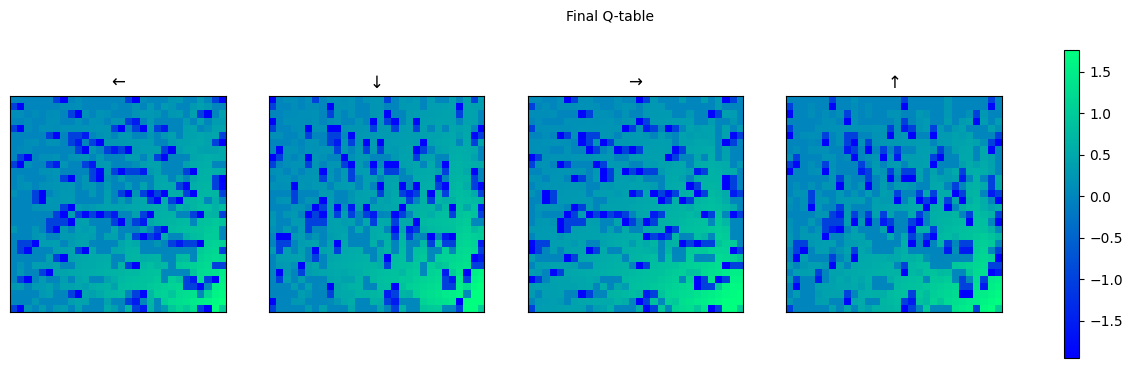

In [5]:
viz_qtable(finalqtable, "Final Q-table")

In [17]:
X = finalqtable.flatten().reshape(-1,1)

In [18]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

# j = 0
# for r in (5, 20, 100):
#     # Construct approximate image
#     Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
#     plt.figure(j+1)
#     j += 1
#     img = plt.imshow(Xapprox.T)
#     img.set_cmap('gray')
#     plt.axis('off')
#     plt.title('r = ' + str(r))
#     plt.show()

In [19]:
print(U.shape, S.shape, VT.shape)

(10000, 1) (1, 1) (1, 1)


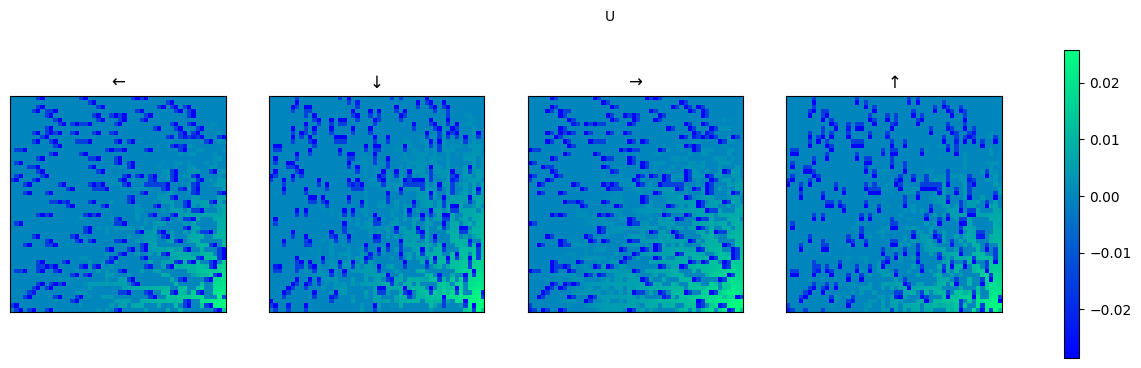

In [20]:
viz_qtable(U.reshape(map_size**2,-1), "U")

In [23]:
S, VT

(array([[68.27904]], dtype=float32), array([[1.]], dtype=float32))

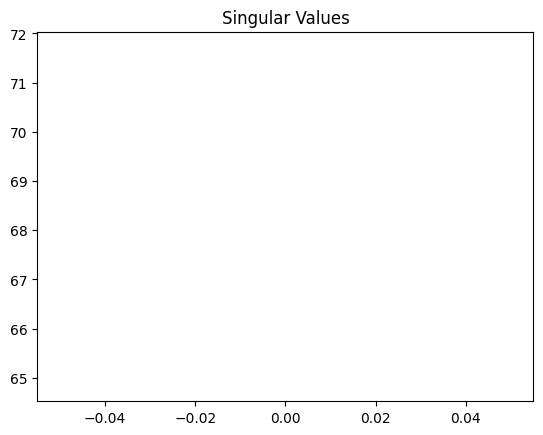

In [21]:
# plt.figure(1)
# # plt.semilogy(np.diag(S))
# plt.plot(np.diag(S))

# plt.title('Singular Values')
# plt.show()

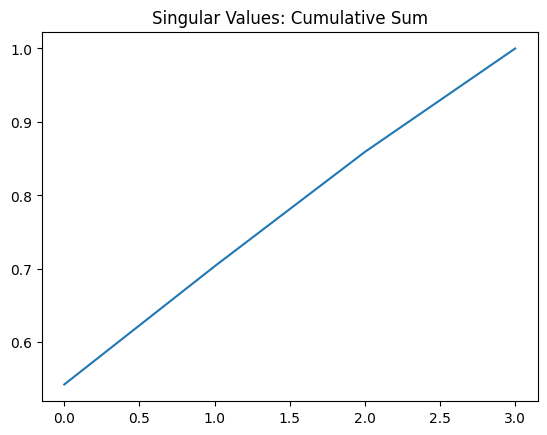

In [11]:
# plt.figure(2)
# plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
# plt.title('Singular Values: Cumulative Sum')
# plt.show()

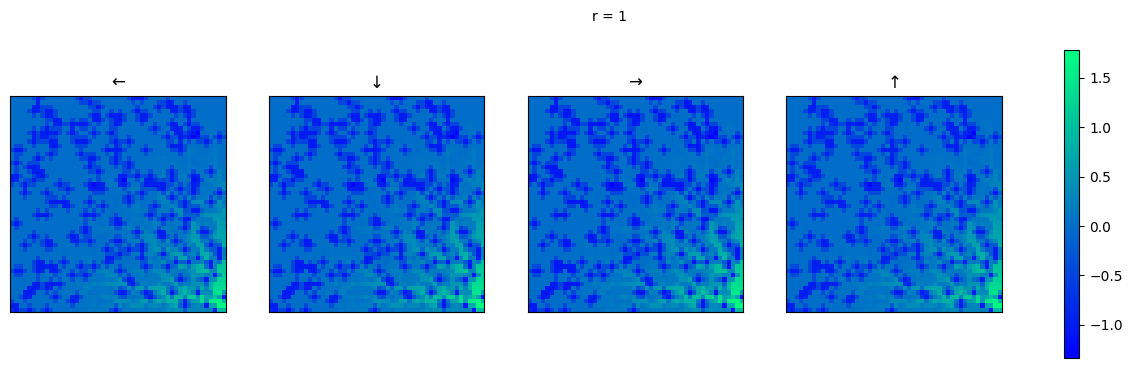

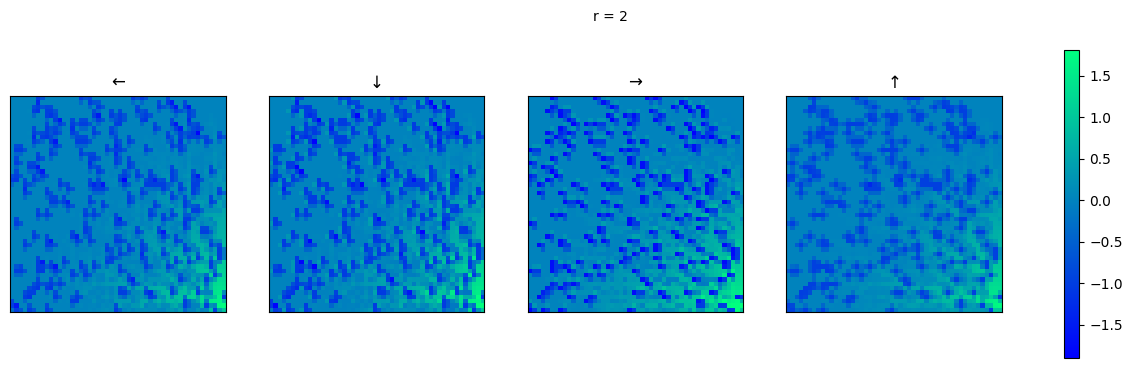

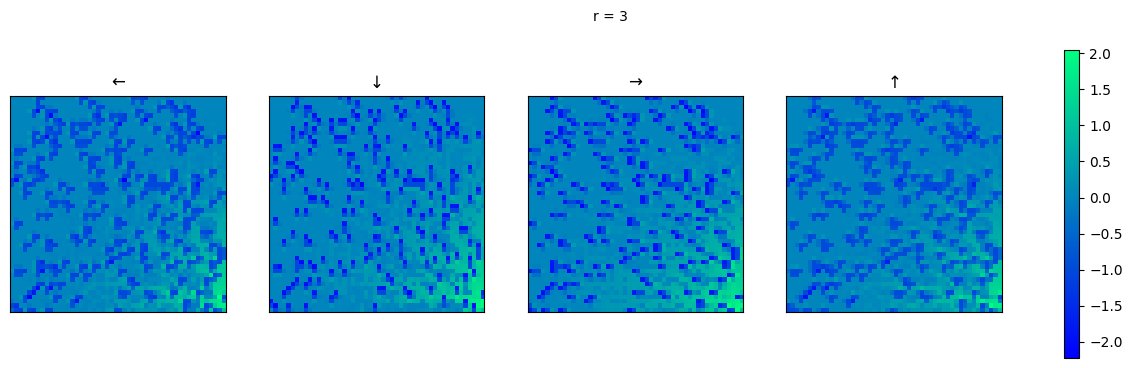

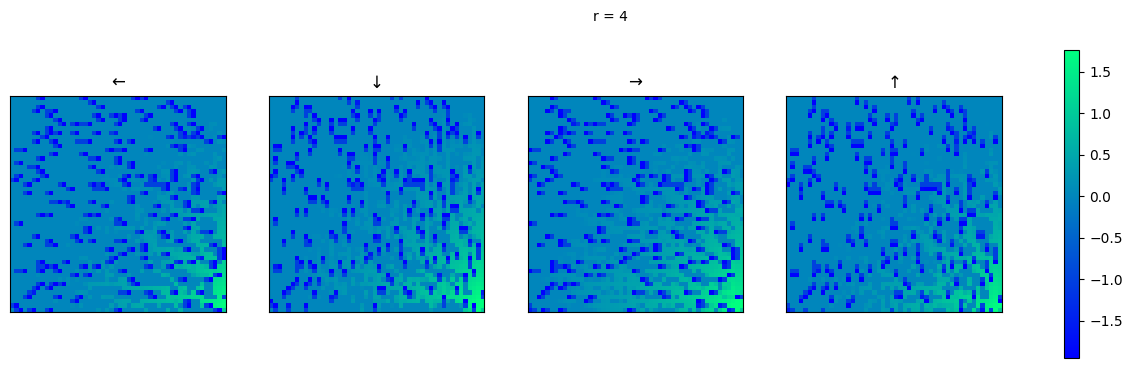

In [16]:
j = 0
for r in (1, 2, 3, 4):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    viz_qtable(Xapprox, f"r = {r}")
    # plt.figure(j+1)
    # j += 1
    # img = plt.imshow(Xapprox)
    # img.set_cmap('gray')
    # plt.axis('off')
    # plt.title('r = ' + str(r))
    # plt.show()